In [19]:
import numpy as np
import sys
sys.path.append("TEMPDATA/SI_richardson16tcr/code/")
import richardson16tcr_module as richardson


# Data from Richardson et al
This is the code used to convert between annual blended time series and SAT (assuming no HadCRUT mask).  

Text(0, 0.5, 'SAT only - blended (oC)')

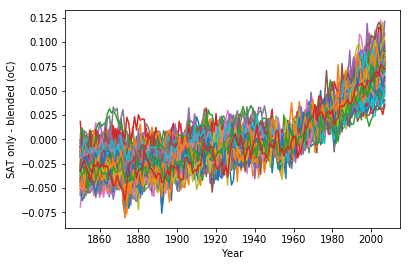

In [127]:
FromRichardson=richardson.annual_blended_series()  
globalair=FromRichardson.hist_rcp85['Txax']
Delta={}
for model in list(globalair.keys()):
    blended=globalair[model]["T"]
    t=globalair[model]["t"].tolist()
   
    SAT_only=globalair[model]["T0"]
    Delta[model]=SAT_only-blended
    plt.plot(years[t.index(1861):t.index(2018)+1],Delta[model][t.index(1861):t.index(2018)+1])
plt.xlabel("Year")
plt.ylabel("SAT only - blended (oC)")

In [131]:
#Define base periods
base_period=(1861,1880)
hist_period=(2002,2017)
getbase=lambda years,T:np.average(T[years.index(base_period[0]):years.index(base_period[1])+1])
gethist=lambda years,T:np.average(T[years.index(hist_period[0]):years.index(hist_period[1])+1])

In [141]:
SATminusBlendedBase=[]
SATminusBlendedHist=[]
already_done=[] #Use only one realization of each model to capture only structural uncertainty, not internal variability
for model in sorted(Delta.keys()):
    stem=model.split("_")[0]
    if stem not in already_done:
        SATminusBlendedBase+=[getbase(t,Delta[model])]
        SATminusBlendedHist+=[gethist(t,Delta[model])]
        already_done+=[stem]

Dbu=np.percentile(SATminusBlendedBase,95)-np.percentile(SATminusBlendedBase,5)
Dfu=np.percentile(SATminusBlendedHist,95)-np.percentile(SATminusBlendedHist,5)
quad_uncertainty=np.sqrt(Dbu**2+Dfu**2)
print(quad_uncertainty)


0.06588081694253364


0.07230000000000002

## Blended_-> SAT Model Offset (K)
Column 3 in Table 4.1


In [139]:
np.average(np.array(SATminusBlendedHist))-np.average(np.array(SATminusBlendedBase))

0.0798798263888889

# Temperature data
Uncomment to choose HadCRUT, C&W, or BEST

In [62]:
#f=open("TEMPDATA/HadCRUT.4.6.0.0.annual_ns_avg.txt")
f=open("TEMPDATA/Cowtan_Way_had4_krig_annual_v2_0_0.txt")
lines=f.readlines()
#f=open("TEMPDATA/BerkeleyEarth.txt")

In [63]:
years=[int(l.split()[0]) for l in lines]
T=[float(l.split()[1]) for l in lines]

0.94

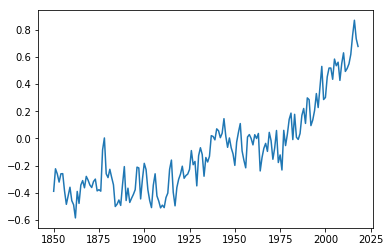

In [64]:
plt.plot(years,T)
Tf=np.average(T[years.index(hist_period[0]):years.index(hist_period[1])+1])
Tbase=np.average(T[years.index(base_period[0]):years.index(base_period[1])+1])
np.round(Tf-Tbase,2)